In [1]:
# specify endpoint
endpoint = 'works'

# build the 'filter' parameter
filters = ",".join((
    'institutions.ror:https://ror.org/02y3ad647',
    'is_paratext:false',
    'type:journal-article', 
    'from_publication_date:2012-08-24'
))

# put the URL together
filtered_works_url = f'https://api.openalex.org/{endpoint}?filter={filters}'
print(f'complete URL with filters:\n{filtered_works_url}')

complete URL with filters:
https://api.openalex.org/works?filter=institutions.ror:https://ror.org/02y3ad647,is_paratext:false,type:journal-article,from_publication_date:2012-08-24


In [3]:
group_by_param = 'group_by=is_oa'

work_groups_url = f'{filtered_works_url}&{group_by_param}'
print(f'complete URL with group_by:\n{work_groups_url}')

complete URL with group_by:
https://api.openalex.org/works?filter=institutions.ror:https://ror.org/02y3ad647,is_paratext:false,type:journal-article,from_publication_date:2012-08-24&group_by=is_oa


In [6]:
import requests, json
response = requests.get(work_groups_url).json()

work_groups = response['group_by']
print(json.dumps(work_groups, indent=2))

[
  {
    "key": "true",
    "key_display_name": "true",
    "count": 30654
  },
  {
    "key": "false",
    "key_display_name": "false",
    "count": 25939
  }
]


In [7]:
def calculate_open_closed_counts(work_groups):
    open_works_count = 0
    closed_works_count = 0
    for index, group in enumerate(work_groups):
        print(f"--> Group {index+1} includes all works where `is_oa` is {group['key']} and has a count of {group['count']} publications.")

        if group['key']=="true":
            open_works_count += group['count']
        else: 
            closed_works_count += group['count']
    
    return open_works_count, closed_works_count

open_works_count, closed_works_count = calculate_open_closed_counts(work_groups)
total_works_count = open_works_count + closed_works_count

if total_works_count > 0:
    print('That makes an OA percentage of %f' % (100 * open_works_count/total_works_count))
else:
    print('OA percentage can`t be determined, no publications in result')

--> Group 1 includes all works where `is_oa` is true and has a count of 30654 publications.
--> Group 2 includes all works where `is_oa` is false and has a count of 25939 publications.
That makes an OA percentage of 54.165710


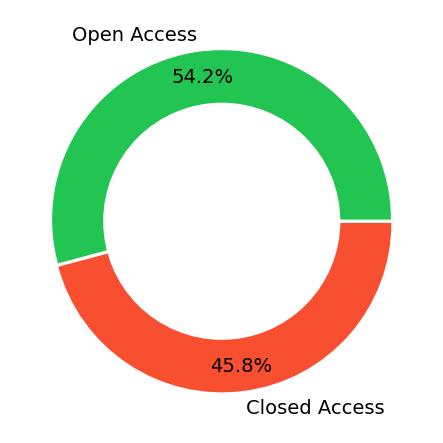

In [11]:
def create_donut_plot(open_works_count, closed_works_count):
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (8,5.5)

    # set labels and their respective values
    groups = ['Open Access', 'Closed Access']
    counts = [open_works_count, closed_works_count]

    # some visual settings
    colors = ['#23c552', '#f84f31']
    explode = (0.01, 0.01)

    # pie chart
    plt.pie(counts, colors=colors, labels=groups,
            autopct='%1.1f%%', pctdistance=0.85,
            explode=explode, textprops={'fontsize': 14})

    # make it a donut (draw circle in the middle)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # display chart
    plt.show()

# create donut chart from open/closed counts
create_donut_plot(open_works_count, closed_works_count)